In [166]:
# !pip install tensorflow==2.4.1 opencv-python mediapipe sklearn matplotlib

In [54]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [69]:
mp_holistic = mp.solutions.holistic          #Holistic Model Class
mp_drawing = mp.solutions.drawing_utils      # Drawing Utilities Class

In [70]:
def mediapipe_detection(image, model):
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)                    # Make Prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results



In [71]:
def draw_landmarks(image,results):
    
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


# Test Camera Capture

In [121]:
cap = cv2.VideoCapture(0)

#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    while cap.isOpened():
        
        #Read Frame
        ret, frame = cap.read()

        #Make Detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)


        #Draw Landmarks
        draw_landmarks(image,results)
        
        
        #Print to Screen
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1);


In [122]:
draw_landmarks(frame, results)

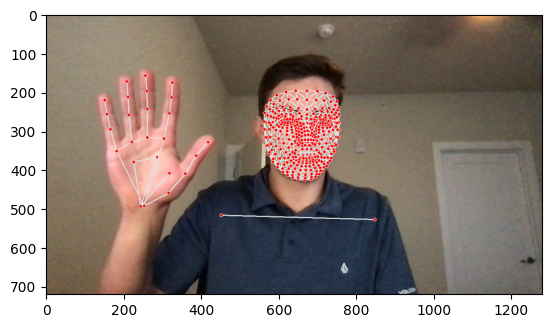

In [123]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [125]:
extract_keypoints(results)

array([ 0.53608215,  0.42585504, -0.52326125, ...,  0.11818015,
        0.30695754, -0.05336319])

# Extract Keypoint Values

In [73]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() \
if results.pose_landmarks else np.zeros(33*4)

In [74]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() \
if results.left_hand_landmarks else np.zeros(21*3)

In [75]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() \
if results.right_hand_landmarks else np.zeros(21*3)

In [76]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
if results.face_landmarks else np.zeros(468*3)

In [155]:
face.shape

(1404,)

In [73]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() \
    if results.pose_landmarks else np.zeros(33*4)
    
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() \
    if results.left_hand_landmarks else np.zeros(21*3)
    
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() \
    if results.right_hand_landmarks else np.zeros(21*3)
    
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
    if results.face_landmarks else np.zeros(468*3)
    
    return np.concatenate([pose, face, lh , rh])

In [78]:
extract_keypoints(results).shape

(1662,)

# Create Directories

In [2]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['Hello','NiceToMeetYou','Thanks','SeeYaLater'])
no_sequences = 30
sequence_length = 30

# Collect Data

In [112]:
cap = cv2.VideoCapture(0)

#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
        
                #Read Frame
                ret, frame = cap.read()

                #Make Detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)


                #Draw Landmarks
                draw_landmarks(image,results)

                
                #Collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence) , (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)   
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image, 'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence) , (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA) 
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
            
            
                #Print to Screen
                cv2.imshow('OpenCV Feed', image)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1);


# Second Round of Data Collection

In [10]:
cap = cv2.VideoCapture(0)

#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    for action in actions:
        for sequence in range(30,60,1):
            for frame_num in range(sequence_length):
                
        
                #Read Frame
                ret, frame = cap.read()

                #Make Detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)


                #Draw Landmarks
                draw_landmarks(image,results)

                
                #Collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence) , (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)   
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image, 'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence) , (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA) 
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
            
            
                #Print to Screen
                cv2.imshow('OpenCV Feed', image)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1);


# Preprocess Data

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
label_map = {label : num for num, label in enumerate(actions)}

In [5]:
label_map

{'Hello': 0, 'NiceToMeetYou': 1, 'Thanks': 2, 'SeeYaLater': 3}

In [6]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(60):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame_num))) #Load in the saved numpy arrays from earlier
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [7]:
X = np.array(sequences)

In [8]:
#y = to_categorical(labels).astype(int)  #One Hot Encode the y vairable

In [9]:
y = np.array(labels)

In [10]:
print(X.shape)
print(y.shape)

(240, 30, 1662)
(240,)


In [11]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 14)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size = 0.1, shuffle = True, random_state = 14)

In [13]:
X_train.shape

(194, 30, 1662)

In [14]:
X_val.shape

(22, 30, 1662)

In [15]:
X_test.shape

(24, 30, 1662)

In [16]:
y_train.shape

(194,)

In [17]:
y_val.shape

(22,)

In [18]:
y_test.shape

(24,)

# Build and Train Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [20]:
#log_dir = os.path.join('Logs')
#tb_callback = TensorBoard(log_dir = log_dir)

In [21]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30, 1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

2022-11-03 15:28:22.312124: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-03 15:28:22.312440: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 596,708
Trainable params: 596,708
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs = 1000, validation_data = (X_val, y_val), batch_size = 97) #callbacks = tb_callback, ,  validation_split = 0.1 OR validation_data = (X_val, y_val)

2022-11-03 15:29:14.361048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/1000
2/2 [==============================] - 3s 1000ms/step - loss: 1.4045 - accuracy: 0.2955 - val_loss: 1.3822 - val_accuracy: 0.2727
Epoch 2/1000
2/2 [==============================] - 0s 143ms/step - loss: 1.3962 - accuracy: 0.2371 - val_loss: 1.4541 - val_accuracy: 0.2727
Epoch 3/1000
2/2 [==============================] - 0s 160ms/step - loss: 1.4530 - accuracy: 0.1375 - val_loss: 1.3702 - val_accuracy: 0.2273
Epoch 4/1000
2/2 [==============================] - 0s 149ms/step - loss: 1.4345 - accuracy: 0.2612 - val_loss: 1.3807 - val_accuracy: 0.4091
Epoch 5/1000
2/2 [==============================] - 0s 154ms/step - loss: 1.3706 - accuracy: 0.3196 - val_loss: 1.3027 - val_accuracy: 0.2727
Epoch 6/1000
2/2 [==============================] - 0s 138ms/step - loss: 1.3087 - accuracy: 0.2440 - val_loss: 1.3287 - val_accuracy: 0.3182
Epoch 7/1000
2/2 [==============================] - 0s 151ms/step - loss: 1.3594 - accuracy: 0.2543 - val_loss: 1.3115 - val_accuracy: 0.4545
Epoch

2/2 [==============================] - 0s 147ms/step - loss: 0.1560 - accuracy: 0.9588 - val_loss: 0.1122 - val_accuracy: 0.9545
Epoch 59/1000
2/2 [==============================] - 0s 151ms/step - loss: 0.1151 - accuracy: 0.9553 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 60/1000
2/2 [==============================] - 0s 145ms/step - loss: 0.1046 - accuracy: 0.9450 - val_loss: 0.0744 - val_accuracy: 0.9545
Epoch 61/1000
2/2 [==============================] - 0s 156ms/step - loss: 0.1153 - accuracy: 0.9622 - val_loss: 0.1075 - val_accuracy: 0.9545
Epoch 62/1000
2/2 [==============================] - 0s 148ms/step - loss: 0.1147 - accuracy: 0.9622 - val_loss: 0.1471 - val_accuracy: 0.9091
Epoch 63/1000
2/2 [==============================] - 0s 151ms/step - loss: 0.1840 - accuracy: 0.9485 - val_loss: 0.4561 - val_accuracy: 0.7727
Epoch 64/1000
2/2 [==============================] - 0s 149ms/step - loss: 0.4902 - accuracy: 0.8076 - val_loss: 0.2726 - val_accuracy: 0.8636
Epoch 65/1000

2/2 [==============================] - 0s 150ms/step - loss: 0.1441 - accuracy: 0.9588 - val_loss: 0.1461 - val_accuracy: 0.9545
Epoch 116/1000
2/2 [==============================] - 0s 150ms/step - loss: 0.1130 - accuracy: 0.9519 - val_loss: 0.2559 - val_accuracy: 0.9091
Epoch 117/1000
2/2 [==============================] - 0s 154ms/step - loss: 0.1770 - accuracy: 0.9278 - val_loss: 0.2640 - val_accuracy: 0.8636
Epoch 118/1000
2/2 [==============================] - 0s 157ms/step - loss: 0.1919 - accuracy: 0.9072 - val_loss: 0.1783 - val_accuracy: 0.9545
Epoch 119/1000
2/2 [==============================] - 0s 153ms/step - loss: 0.1644 - accuracy: 0.9416 - val_loss: 0.0974 - val_accuracy: 0.9091
Epoch 120/1000
2/2 [==============================] - 0s 165ms/step - loss: 0.1517 - accuracy: 0.9553 - val_loss: 0.0793 - val_accuracy: 0.9545
Epoch 121/1000
2/2 [==============================] - 0s 150ms/step - loss: 0.0974 - accuracy: 0.9588 - val_loss: 0.1693 - val_accuracy: 0.9545
Epoch 1

Epoch 172/1000
2/2 [==============================] - 0s 171ms/step - loss: 0.0869 - accuracy: 0.9588 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 173/1000
2/2 [==============================] - 0s 168ms/step - loss: 0.0931 - accuracy: 0.9622 - val_loss: 0.1221 - val_accuracy: 0.9545
Epoch 174/1000
2/2 [==============================] - 0s 164ms/step - loss: 0.0598 - accuracy: 0.9828 - val_loss: 0.0782 - val_accuracy: 0.9545
Epoch 175/1000
2/2 [==============================] - 0s 158ms/step - loss: 0.1008 - accuracy: 0.9656 - val_loss: 0.0509 - val_accuracy: 0.9545
Epoch 176/1000
2/2 [==============================] - 0s 176ms/step - loss: 0.0624 - accuracy: 0.9759 - val_loss: 0.1205 - val_accuracy: 0.9545
Epoch 177/1000
2/2 [==============================] - 0s 156ms/step - loss: 0.0671 - accuracy: 0.9691 - val_loss: 0.0423 - val_accuracy: 0.9545
Epoch 178/1000
2/2 [==============================] - 0s 153ms/step - loss: 0.0913 - accuracy: 0.9588 - val_loss: 0.1008 - val_accuracy:

Epoch 229/1000
2/2 [==============================] - 0s 156ms/step - loss: 0.2093 - accuracy: 0.9244 - val_loss: 0.1589 - val_accuracy: 0.9545
Epoch 230/1000
2/2 [==============================] - 0s 168ms/step - loss: 0.1358 - accuracy: 0.9691 - val_loss: 0.0809 - val_accuracy: 1.0000
Epoch 231/1000
2/2 [==============================] - 0s 165ms/step - loss: 0.1517 - accuracy: 0.9347 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 232/1000
2/2 [==============================] - 0s 163ms/step - loss: 0.1151 - accuracy: 0.9691 - val_loss: 0.1453 - val_accuracy: 0.9545
Epoch 233/1000
2/2 [==============================] - 0s 161ms/step - loss: 0.1365 - accuracy: 0.9656 - val_loss: 0.1055 - val_accuracy: 0.9545
Epoch 234/1000
2/2 [==============================] - 0s 160ms/step - loss: 0.0872 - accuracy: 0.9828 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 235/1000
2/2 [==============================] - 0s 161ms/step - loss: 0.0933 - accuracy: 0.9622 - val_loss: 0.0858 - val_accuracy:

Epoch 286/1000
2/2 [==============================] - 0s 160ms/step - loss: 0.3370 - accuracy: 0.8282 - val_loss: 0.6306 - val_accuracy: 0.6818
Epoch 287/1000
2/2 [==============================] - 0s 159ms/step - loss: 0.6023 - accuracy: 0.7491 - val_loss: 0.6981 - val_accuracy: 0.6818
Epoch 288/1000
2/2 [==============================] - 0s 154ms/step - loss: 0.5985 - accuracy: 0.7526 - val_loss: 0.4654 - val_accuracy: 0.8182
Epoch 289/1000
2/2 [==============================] - 0s 192ms/step - loss: 0.4349 - accuracy: 0.9038 - val_loss: 0.4004 - val_accuracy: 0.9091
Epoch 290/1000
2/2 [==============================] - 0s 158ms/step - loss: 0.4601 - accuracy: 0.8900 - val_loss: 0.3396 - val_accuracy: 1.0000
Epoch 291/1000
2/2 [==============================] - 0s 156ms/step - loss: 0.4025 - accuracy: 0.9313 - val_loss: 0.3240 - val_accuracy: 0.9545
Epoch 292/1000
2/2 [==============================] - 0s 153ms/step - loss: 0.3987 - accuracy: 0.9485 - val_loss: 0.3197 - val_accuracy:

Epoch 343/1000
2/2 [==============================] - 0s 152ms/step - loss: 0.0359 - accuracy: 0.9966 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 344/1000
2/2 [==============================] - 0s 156ms/step - loss: 0.0508 - accuracy: 0.9897 - val_loss: 0.0449 - val_accuracy: 0.9545
Epoch 345/1000
2/2 [==============================] - 0s 153ms/step - loss: 0.0519 - accuracy: 0.9931 - val_loss: 0.0803 - val_accuracy: 0.9545
Epoch 346/1000
2/2 [==============================] - 0s 157ms/step - loss: 0.0526 - accuracy: 0.9931 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 347/1000
2/2 [==============================] - 0s 157ms/step - loss: 0.0516 - accuracy: 0.9931 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 348/1000
2/2 [==============================] - 0s 162ms/step - loss: 0.0490 - accuracy: 0.9931 - val_loss: 0.0557 - val_accuracy: 0.9545
Epoch 349/1000
2/2 [==============================] - 0s 169ms/step - loss: 0.0372 - accuracy: 0.9931 - val_loss: 0.0528 - val_accuracy:

Epoch 400/1000
2/2 [==============================] - 0s 154ms/step - loss: 0.2100 - accuracy: 0.9828 - val_loss: 0.1955 - val_accuracy: 1.0000
Epoch 401/1000
2/2 [==============================] - 0s 158ms/step - loss: 0.2091 - accuracy: 0.9863 - val_loss: 0.2772 - val_accuracy: 0.9545
Epoch 402/1000
2/2 [==============================] - 0s 156ms/step - loss: 0.2296 - accuracy: 0.9828 - val_loss: 0.2167 - val_accuracy: 0.9545
Epoch 403/1000
2/2 [==============================] - 0s 152ms/step - loss: 0.1822 - accuracy: 0.9828 - val_loss: 0.1457 - val_accuracy: 1.0000
Epoch 404/1000
2/2 [==============================] - 0s 155ms/step - loss: 0.1871 - accuracy: 0.9622 - val_loss: 0.3279 - val_accuracy: 0.9545
Epoch 405/1000
2/2 [==============================] - 0s 157ms/step - loss: 0.1840 - accuracy: 0.9759 - val_loss: 0.0795 - val_accuracy: 1.0000
Epoch 406/1000
2/2 [==============================] - 0s 154ms/step - loss: 0.1825 - accuracy: 0.9519 - val_loss: 0.2712 - val_accuracy:

Epoch 457/1000
2/2 [==============================] - 0s 157ms/step - loss: 0.0394 - accuracy: 0.9931 - val_loss: 0.0418 - val_accuracy: 0.9545
Epoch 458/1000
2/2 [==============================] - 0s 161ms/step - loss: 0.0391 - accuracy: 0.9931 - val_loss: 0.0392 - val_accuracy: 0.9545
Epoch 459/1000
2/2 [==============================] - 0s 158ms/step - loss: 0.0379 - accuracy: 0.9931 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 460/1000
2/2 [==============================] - 0s 162ms/step - loss: 0.0382 - accuracy: 0.9931 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 461/1000
2/2 [==============================] - 0s 155ms/step - loss: 0.0376 - accuracy: 0.9931 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 462/1000
2/2 [==============================] - 0s 158ms/step - loss: 0.0222 - accuracy: 0.9966 - val_loss: 0.0385 - val_accuracy: 0.9545
Epoch 463/1000
2/2 [==============================] - 0s 154ms/step - loss: 0.0373 - accuracy: 0.9931 - val_loss: 0.0340 - val_accuracy:

Epoch 514/1000
2/2 [==============================] - 0s 157ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 515/1000
2/2 [==============================] - 0s 163ms/step - loss: 0.0235 - accuracy: 0.9897 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 516/1000
2/2 [==============================] - 0s 159ms/step - loss: 0.0309 - accuracy: 0.9897 - val_loss: 0.0466 - val_accuracy: 0.9545
Epoch 517/1000
2/2 [==============================] - 0s 157ms/step - loss: 0.0721 - accuracy: 0.9897 - val_loss: 0.3359 - val_accuracy: 0.8636
Epoch 518/1000
2/2 [==============================] - 0s 163ms/step - loss: 1.0472 - accuracy: 0.7732 - val_loss: 0.3557 - val_accuracy: 0.9091
Epoch 519/1000
2/2 [==============================] - 0s 158ms/step - loss: 0.2886 - accuracy: 0.9038 - val_loss: 0.5122 - val_accuracy: 0.6818
Epoch 520/1000
2/2 [==============================] - 0s 153ms/step - loss: 0.5820 - accuracy: 0.7354 - val_loss: 0.3470 - val_accuracy:

Epoch 571/1000
2/2 [==============================] - 0s 156ms/step - loss: 0.0463 - accuracy: 0.9931 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 572/1000
2/2 [==============================] - 0s 154ms/step - loss: 0.0512 - accuracy: 0.9863 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 573/1000
2/2 [==============================] - 0s 160ms/step - loss: 0.0392 - accuracy: 0.9966 - val_loss: 0.0788 - val_accuracy: 0.9545
Epoch 574/1000
2/2 [==============================] - 0s 156ms/step - loss: 0.0577 - accuracy: 0.9863 - val_loss: 0.0555 - val_accuracy: 0.9545
Epoch 575/1000
2/2 [==============================] - 0s 160ms/step - loss: 0.0438 - accuracy: 0.9931 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 576/1000
2/2 [==============================] - 0s 166ms/step - loss: 0.0401 - accuracy: 0.9931 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 577/1000
2/2 [==============================] - 0s 162ms/step - loss: 0.0432 - accuracy: 0.9931 - val_loss: 0.0584 - val_accuracy:

Epoch 628/1000
2/2 [==============================] - 0s 157ms/step - loss: 0.0321 - accuracy: 0.9931 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 629/1000
2/2 [==============================] - 0s 155ms/step - loss: 0.0313 - accuracy: 0.9931 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 630/1000
2/2 [==============================] - 0s 168ms/step - loss: 0.0185 - accuracy: 0.9966 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 631/1000
2/2 [==============================] - 0s 164ms/step - loss: 0.0316 - accuracy: 0.9931 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 632/1000
2/2 [==============================] - 0s 166ms/step - loss: 0.0309 - accuracy: 0.9931 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 633/1000
2/2 [==============================] - 0s 154ms/step - loss: 0.0181 - accuracy: 0.9966 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 634/1000
2/2 [==============================] - 0s 155ms/step - loss: 0.0310 - accuracy: 0.9931 - val_loss: 0.0198 - val_accuracy:

Epoch 685/1000
2/2 [==============================] - 0s 164ms/step - loss: 0.0232 - accuracy: 0.9966 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 686/1000
2/2 [==============================] - 0s 161ms/step - loss: 0.0231 - accuracy: 0.9966 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 687/1000
2/2 [==============================] - 0s 167ms/step - loss: 0.0382 - accuracy: 0.9931 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 688/1000
2/2 [==============================] - 0s 165ms/step - loss: 0.0229 - accuracy: 0.9966 - val_loss: 0.0386 - val_accuracy: 0.9545
Epoch 689/1000
2/2 [==============================] - 0s 164ms/step - loss: 0.0368 - accuracy: 0.9931 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 690/1000
2/2 [==============================] - 0s 164ms/step - loss: 0.0358 - accuracy: 0.9931 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 691/1000
2/2 [==============================] - 0s 162ms/step - loss: 0.0359 - accuracy: 0.9931 - val_loss: 0.0183 - val_accuracy:

Epoch 742/1000
2/2 [==============================] - 0s 177ms/step - loss: 0.0277 - accuracy: 0.9931 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 743/1000
2/2 [==============================] - 0s 175ms/step - loss: 0.0272 - accuracy: 0.9931 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 744/1000
2/2 [==============================] - 0s 174ms/step - loss: 0.0271 - accuracy: 0.9931 - val_loss: 0.0444 - val_accuracy: 0.9545
Epoch 745/1000
2/2 [==============================] - 0s 176ms/step - loss: 0.0272 - accuracy: 0.9931 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 746/1000
2/2 [==============================] - 0s 167ms/step - loss: 0.0167 - accuracy: 0.9966 - val_loss: 0.0357 - val_accuracy: 0.9545
Epoch 747/1000
2/2 [==============================] - 0s 167ms/step - loss: 0.0262 - accuracy: 0.9931 - val_loss: 0.0725 - val_accuracy: 0.9545
Epoch 748/1000
2/2 [==============================] - 0s 165ms/step - loss: 0.0265 - accuracy: 0.9931 - val_loss: 0.0121 - val_accuracy:

Epoch 799/1000
2/2 [==============================] - 0s 164ms/step - loss: 0.0556 - accuracy: 0.9863 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 800/1000
2/2 [==============================] - 0s 167ms/step - loss: 0.0485 - accuracy: 0.9897 - val_loss: 0.0520 - val_accuracy: 0.9545
Epoch 801/1000
2/2 [==============================] - 0s 162ms/step - loss: 0.0559 - accuracy: 0.9794 - val_loss: 0.0417 - val_accuracy: 0.9545
Epoch 802/1000
2/2 [==============================] - 0s 165ms/step - loss: 0.0486 - accuracy: 0.9897 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 803/1000
2/2 [==============================] - 0s 154ms/step - loss: 0.0379 - accuracy: 0.9897 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 804/1000
2/2 [==============================] - 0s 159ms/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 805/1000
2/2 [==============================] - 0s 159ms/step - loss: 0.0489 - accuracy: 0.9863 - val_loss: 0.0360 - val_accuracy:

Epoch 856/1000
2/2 [==============================] - 0s 160ms/step - loss: 0.0192 - accuracy: 0.9966 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 857/1000
2/2 [==============================] - 0s 163ms/step - loss: 0.0188 - accuracy: 0.9966 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 858/1000
2/2 [==============================] - 0s 158ms/step - loss: 0.0322 - accuracy: 0.9931 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 859/1000
2/2 [==============================] - 0s 158ms/step - loss: 0.0186 - accuracy: 0.9966 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 860/1000
2/2 [==============================] - 0s 163ms/step - loss: 0.0190 - accuracy: 0.9966 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 861/1000
2/2 [==============================] - 0s 159ms/step - loss: 0.0187 - accuracy: 0.9966 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 862/1000
2/2 [==============================] - 0s 166ms/step - loss: 0.0189 - accuracy: 0.9966 - val_loss: 0.0135 - val_accuracy:

Epoch 913/1000
2/2 [==============================] - 0s 170ms/step - loss: 0.0169 - accuracy: 0.9966 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 914/1000
2/2 [==============================] - 0s 162ms/step - loss: 0.0285 - accuracy: 0.9931 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 915/1000
2/2 [==============================] - 0s 167ms/step - loss: 0.0172 - accuracy: 0.9966 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 916/1000
2/2 [==============================] - 0s 160ms/step - loss: 0.0169 - accuracy: 0.9966 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 917/1000
2/2 [==============================] - 0s 162ms/step - loss: 0.0287 - accuracy: 0.9931 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 918/1000
2/2 [==============================] - 0s 165ms/step - loss: 0.0169 - accuracy: 0.9966 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 919/1000
2/2 [==============================] - 0s 164ms/step - loss: 0.0285 - accuracy: 0.9931 - val_loss: 0.0106 - val_accuracy:

Epoch 970/1000
2/2 [==============================] - 0s 163ms/step - loss: 0.0253 - accuracy: 0.9931 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 971/1000
2/2 [==============================] - 0s 166ms/step - loss: 0.0259 - accuracy: 0.9931 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 972/1000
2/2 [==============================] - 0s 164ms/step - loss: 0.0152 - accuracy: 0.9966 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 973/1000
2/2 [==============================] - 0s 172ms/step - loss: 0.0150 - accuracy: 0.9966 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 974/1000
2/2 [==============================] - 0s 168ms/step - loss: 0.0152 - accuracy: 0.9966 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 975/1000
2/2 [==============================] - 0s 166ms/step - loss: 0.0146 - accuracy: 0.9966 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 976/1000
2/2 [==============================] - 0s 162ms/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.0073 - val_accuracy:

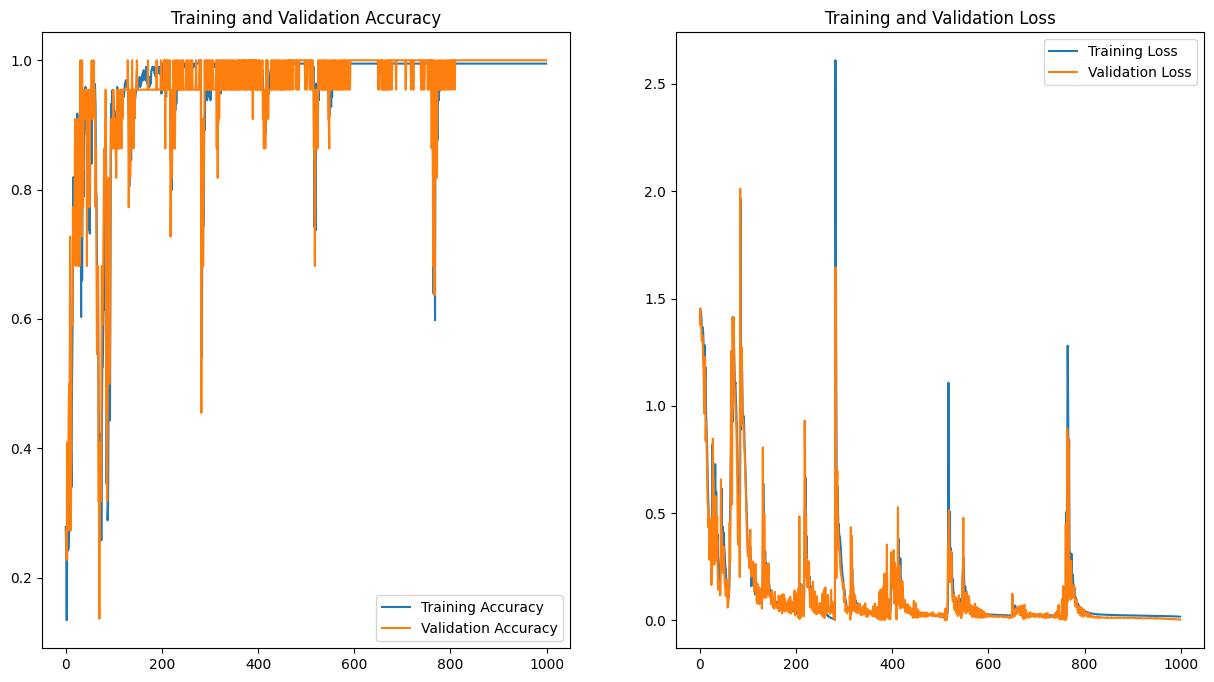

In [35]:
results = model.history

acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

epochs_range = range(len(results.history['accuracy']))

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
y_pred = [np.argmax(pred) for pred in model.predict(X_test)]
y_pred

[3, 0, 0, 0, 1, 1, 2, 2, 3, 0, 1, 1, 0, 2, 2, 0, 3, 1, 0, 3, 2, 3, 1, 1]

In [50]:
y_test

array([3, 0, 0, 0, 1, 1, 2, 2, 3, 0, 1, 1, 0, 2, 2, 0, 3, 1, 0, 3, 2, 3,
       1, 1])

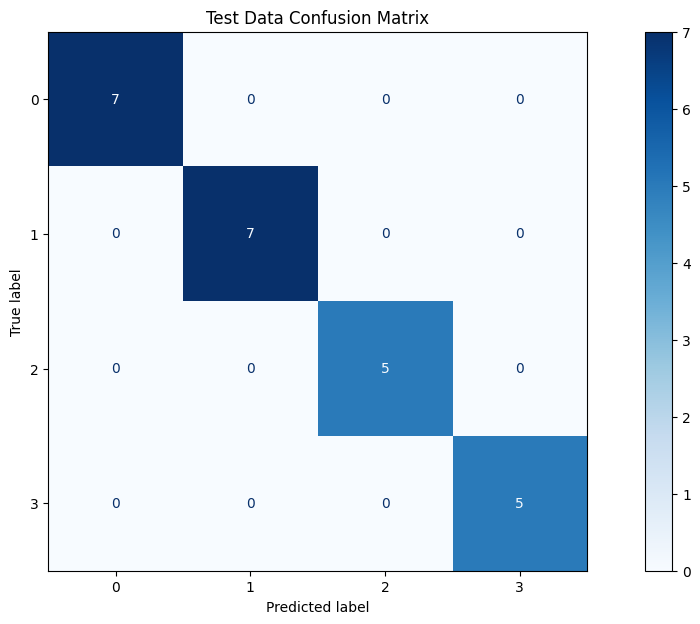

In [53]:
fig, ax = plt.subplots(figsize = (15,7))
ax.set_title('Test Data Confusion Matrix')

labels = actions

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues, ax = ax);

In [55]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 0.0020 - accuracy: 1.0000


[0.002004592213779688, 1.0]

# Saving and Rebuilding Model

In [60]:
model.save('action.h5')

In [61]:
# Now, to rebuild: 

# 1) Create model (reconstructed_model = Sequential...)

# 2) Compile Model (reconstructed_model.compile...)

# 3) Load Weights (reconstructed_model.load_weights('action.h5') )

#EX:

In [62]:
del model

In [63]:
model

# Will be undefined

NameError: name 'model' is not defined

In [64]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30, 1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [65]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [66]:
model.load_weights('action.h5')

In [67]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 686ms/step - loss: 0.0020 - accuracy: 1.0000


[0.002004592213779688, 1.0]

# Testing in Real Time

In [165]:
# New variables

sequence = []
sentence = []
predictions = []
threshold = 0.999

cap = cv2.VideoCapture(0)

#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    while cap.isOpened():
        
        #Read Frame
        ret, frame = cap.read()

        #Make Detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)


        #Draw Landmarks
        #draw_landmarks(image,results)
        
        
        #Predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis = 0))[0] #Expand dims to only predict a single image shape(1, 30, 1662)
            predictions.append(np.argmax(res))
            
            
            #Visualize Phrases
            #if np.unique(predictions[-10:])[0] == np.argmax(res):
            if np.sum(predictions[-10:]) == np.argmax(res) * 10:
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]
            
        #cv2.rectangle(image, (0, 0), (1000, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        
        #Print to Screen
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1);

0